In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [53]:
df = pd.read_csv("BreastCancer.csv", index_col='id')
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df = df[['radius_se', 'perimeter_worst', 'concavity_mean', 'compactness_worst', 'diagnosis']]
df['diagnosis'] = df['diagnosis'].map({'M': True, 'B': False})
df.describe()

,radius_se,perimeter_worst,concavity_mean,compactness_worst
count,569.000000,569.000000,569.000000,569.000000
mean,0.405172,107.261213,0.088799,0.254265
std,0.277313,33.602542,0.079720,0.157336
min,0.111500,50.410000,0.000000,0.027290
25%,0.232400,84.110000,0.029560,0.147200
50%,0.324200,97.660000,0.061540,0.211900
75%,0.478900,125.400000,0.130700,0.339100
max,2.873000,251.200000,0.426800,1.058000


We should normalize parameters because we have perimeter_worst parameter with range from 50.41 to 251.2.  The rest parameters are less than 2.87 (redius_se), 0.43 (concavity_mean) and 1.058 (compactness_worst). It means that the concavity_mean has the highest influence and the perimeter_worst has the lowest influence without normalization. However, we should normalize the data after separation into training and testing part and normalize each part independently. 

In [54]:
X = df[['radius_se', 'perimeter_worst', 'concavity_mean', 'compactness_worst']]
y = df['diagnosis']
X, y

(          radius_se  perimeter_worst  concavity_mean  compactness_worst
 id                                                                     
 842302       1.0950           184.60         0.30010            0.66560
 842517       0.5435           158.80         0.08690            0.18660
 84300903     0.7456           152.50         0.19740            0.42450
 84348301     0.4956            98.87         0.24140            0.86630
 84358402     0.7572           152.20         0.19800            0.20500
 ...             ...              ...             ...                ...
 926424       1.1760           166.10         0.24390            0.21130
 926682       0.7655           155.00         0.14400            0.19220
 926954       0.4564           126.70         0.09251            0.30940
 927241       0.7260           184.60         0.35140            0.86810
 92751        0.3857            59.16         0.00000            0.06444
 
 [569 rows x 4 columns],
 id
 842302       True
 

In [55]:
y.value_counts(normalize=True)

False    0.627417
True     0.372583
Name: diagnosis, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 4), (171, 4), (398,), (171,))

In [57]:
y_train.value_counts(normalize=True)

False    0.628141
True     0.371859
Name: diagnosis, dtype: float64

In [58]:
y_test.value_counts(normalize=True)

False    0.625731
True     0.374269
Name: diagnosis, dtype: float64

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(X_train_scaled, y_train)
predict = kNN.predict(X_test_scaled)
print ("Accuracy Score: " + str(accuracy_score(predict, y_test)) + 
        ", Precision Score: " + str(precision_score(predict, y_test)) +
        ", Recall Score: " + str(recall_score(predict, y_test)) + 
        ", F1 Score: " + str(f1_score(predict, y_test)))

Accuracy Score: 0.935672514619883, Precision Score: 0.890625, Recall Score: 0.9344262295081968, F1 Score: 0.9120000000000001


In [67]:
from sklearn import metrics

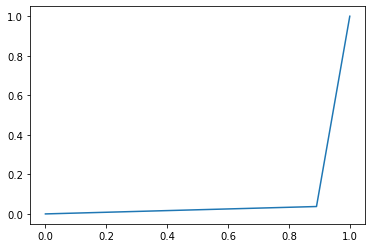

In [75]:
y_true = y_test
y_probas = kNN.predict(X_test_scaled)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)
plt.plot(fpr,tpr)
plt.show() 

In [77]:
from numpy import trapz
area = trapz(y, dx=0.01)
print("area =", area)

area = 1.5900000000000003


In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1,50), 'p':range(1,5)}
knn = KNeighborsClassifier()
grid_search =GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)
print ("Best neighbors: " + str(grid_search.best_estimator_.n_neighbors) + ", Best metrics: " +
      str(grid_search.best_estimator_.p))

Best neighbors: 9, Best metrics: 4


In [84]:
kNN = KNeighborsClassifier(n_neighbors=9, p=4)
kNN.fit(X_train_scaled, y_train)
predict = kNN.predict(X_test_scaled)
print ("Accuracy Score: " + str(accuracy_score(predict, y_test)) + 
        ", Precision Score: " + str(precision_score(predict, y_test)) +
        ", Recall Score: " + str(recall_score(predict, y_test)) + 
        ", F1 Score: " + str(f1_score(predict, y_test)))

Accuracy Score: 0.9473684210526315, Precision Score: 0.921875, Recall Score: 0.9365079365079365, F1 Score: 0.9291338582677166


We used recall scoring because it is more important for us to decrease false negative predictions. Because if we have bad cancer and predict it as negative (prediction is good cancer), the price of mistake will be high. After cross-validation all parameter become higher, unfortunately, recall score has the lowest upgrade.